In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
input_file = 'HepG2_SDOC_active_result.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,10,0.437330,0.614114
1,chr1,3430000,5990000,0,1.050111,-0.520215
2,chr1,5990000,6040000,0,0.003852,-0.520215
3,chr1,6040000,6700000,3,0.203751,0.525532
4,chr1,6700000,7660000,0,0.222518,-0.520215
...,...,...,...,...,...,...
2637,chr9,136730000,136790000,0,0.006576,-0.520215
2638,chr9,136790000,136940000,34,0.024912,2.321254
2639,chr9,136940000,137120000,0,0.046040,-0.520215
2640,chr9,137120000,137280000,0,0.032555,-0.520215


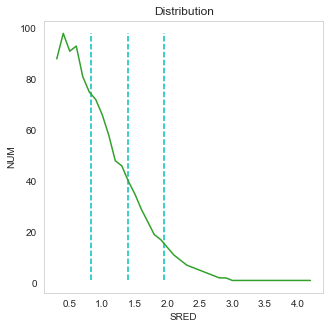

In [3]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(x, y, color=(51/255, 160/255, 44/255))

plt.xlabel('SRED')
plt.ylabel('NUM')
plt.title('Distribution')

for i in range(3):
    plt.vlines(_thresholds[i], result.values.min(), result.values.max(), colors = "c", linestyles = "dashed")
plt.savefig('figure_file/a.pdf')
plt.show()

In [4]:
Homo_sapiens_GRCh38_file = '/data1/lmh_data/MINE/source/Homo_sapiens.GRCh38.84.gtf'
Homo_sapiens_GRCh38 = dict()
with open(Homo_sapiens_GRCh38_file, 'r')as f:
    for line in f:
        datas = line.strip().split()
        if len(datas) < 4:
            continue
        if datas[2] != "gene":
            continue
        gene_id = datas[9].split('"')[1]
        Homo_sapiens_GRCh38[gene_id] = [datas[0], int(datas[3]), int(datas[4])]

RNA_seq_file = '/data1/lmh_data/MINE/source/HepG2/RNA_seq_rpkms.xls'
rna_infos = pd.read_excel(RNA_seq_file)
rna_infos["rna_rpkms_avg"] = rna_infos[["SS_FSU_43_none_RNAseq", "SS_FSU_44_none_RNAseq"]].mean(axis=1)
rna_infos = rna_infos.loc[rna_infos["rna_rpkms_avg"]>0]
rna_infos.insert(rna_infos.shape[1], 'Chromosome', '')
rna_infos.insert(rna_infos.shape[1], 'Gene start (bp)', 0)
rna_infos.insert(rna_infos.shape[1], 'Gene end (bp)', 0)
for index in rna_infos.index:
    if rna_infos.loc[index]["Geneid"] not in Homo_sapiens_GRCh38.keys():
        continue
    data = Homo_sapiens_GRCh38[rna_infos.loc[index]["Geneid"]]
    rna_infos.loc[index, "Chromosome"] = data[0]
    rna_infos.loc[index, "Gene start (bp)"] = data[1]
    rna_infos.loc[index, "Gene end (bp)"] = data[2]
rna_infos

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
2,ENSG00000278267,0.000,0.000,0.000,0.000,2.881,8.668,1.957,3.044,5.7745,1,17369,17436
9,ENSG00000238009,0.000,0.000,0.000,0.000,0.049,0.010,0.029,0.010,0.0295,1,89295,133723
12,ENSG00000268903,0.000,0.000,0.000,0.000,0.228,0.536,0.753,0.290,0.3820,1,135141,135895
13,ENSG00000269981,0.000,0.000,0.000,0.000,0.729,0.728,1.070,0.770,0.7285,1,137682,137965
15,ENSG00000241860,0.000,0.000,0.000,0.000,0.104,0.093,0.058,0.039,0.0985,1,141474,173862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,ENSG00000276112,0.000,0.000,0.000,0.000,3.858,3.473,0.606,1.648,3.6655,KI270733.1,124758,124937
60582,ENSG00000275104,158.948,186.994,178.420,145.462,1.756,1.696,0.544,2.084,1.7260,KI270733.1,169844,170023
60595,ENSG00000273748,0.000,0.000,0.000,0.000,0.492,0.176,0.432,0.715,0.3340,GL000219.1,54224,83311
60633,ENSG00000278384,0.000,0.000,0.000,0.000,1.111,0.911,0.853,1.156,1.0110,GL000218.1,51867,54893


In [5]:
# infos.insert(infos.shape[1], 'RNA_rpkms', 0)
for index in infos.index:
    _chr, _start, _end = infos.loc[index][0], infos.loc[index][1], infos.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    result = temp[["rna_rpkms_avg"]].mean()
    infos.loc[index, "RNA_rpkms"] = math.log(result["rna_rpkms_avg"], 2)


In [6]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"small": colors[0], "middle": colors[1], "high": colors[2], "ultra_high": colors[3]}

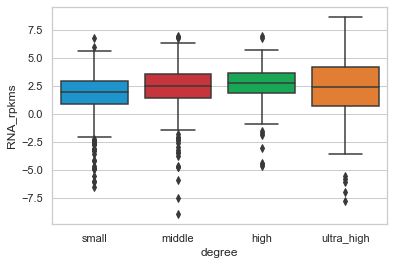

In [7]:
small = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
ultra_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

small["degree"] = "small"
middle["degree"] = "middle"
high["degree"] = "high"
ultra_high["degree"] = "ultra_high"

df = pd.concat([small, middle, high, ultra_high])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="degree", y="RNA_rpkms", data=df, palette=my_pal)
fig = ax.get_figure()
fig.savefig('figure_file/b.pdf')

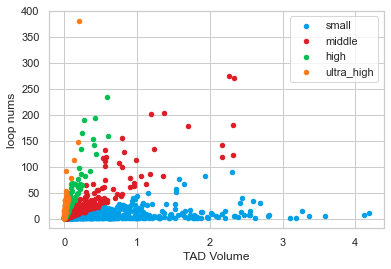

In [8]:
small["TAD Volume"] = small.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
ultra_high["TAD Volume"] = ultra_high.loc[:, 4]

small["loop nums"] = small.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
ultra_high["loop nums"] = ultra_high.loc[:, 3]

small.to_csv('temp/active_small.csv')
middle.to_csv('temp/active_middle.csv')
high.to_csv('temp/active_high.csv')
ultra_high.to_csv('temp/active_ultra_high.csv')

ax = small.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["small"], label='small')
ax = middle.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["middle"], label='middle', ax=ax)
ax = high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["high"], label='high', ax=ax)
ax = ultra_high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["ultra_high"], label='ultra_high', ax=ax)

fig = ax.get_figure()
fig.savefig('figure_file/c.pdf')

In [9]:
Gene_table = pd.read_csv("/data1/lmh_data/MINE/source/Gene_table_20211231.txt", sep="\t")

/home/lmh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
_mean = ultra_high[["RNA_rpkms"]].mean()["RNA_rpkms"]
low_rpkms = ultra_high.loc[ultra_high["RNA_rpkms"]<=_mean].copy()
for index in low_rpkms.index:
    _chr, _start, _end = low_rpkms.loc[index][0], low_rpkms.loc[index][1], low_rpkms.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    geneids = temp["Geneid"].tolist()
    gene_names = set()
    for gene_id in geneids:
        gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
    gene_names -= {np.nan}
    low_rpkms.loc[index, "Gene names"] = ','.join(list(gene_names))
low_rpkms.to_csv('temp/active_ultra_high(low_rpkms).csv')
low_rpkms

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,Gene names
147,chr1,143690000,147250000,381,0.196909,2.559569,1.268978,ultra_high,0.196909,381,"SRGAP2D,NBPF25P,POLR3GL,NBPF20,LIX1L-AS1,PFN1P..."
549,chr12,9060000,9110000,5,0.006389,1.981580,-2.790859,ultra_high,0.006389,5,A2M-AS1
678,chr12,130750000,130820000,14,0.018466,1.959381,-5.539520,ultra_high,0.018466,14,
797,chr14,75310000,75660000,24,0.026085,2.065436,-1.267080,ultra_high,0.026085,24,"BATF,JDP2-AS1,JDP2"
802,chr14,76870000,77140000,23,0.016017,2.338739,1.179670,ultra_high,0.016017,23,"RPL22P2,CIPC,LINC02288,IRF2BPL"
963,chr16,30660000,30700000,2,0.001783,2.153072,0.625270,ultra_high,0.001783,2,
1369,chr2,73170000,73220000,4,0.002087,2.535649,-6.965784,ultra_high,0.002087,4,NOTO
1371,chr2,74690000,74890000,15,0.017014,2.042641,0.502331,ultra_high,0.017014,15,HK2-DT
1377,chr2,88560000,88690000,35,0.008932,3.101486,-3.351074,ultra_high,0.008932,35,EIF2AK3-DT
1392,chr2,111120000,112120000,114,0.141642,2.012632,0.930787,ultra_high,0.141642,114,"MERTK,PAFAH1B1P2,SOCAR,RN7SL297P,SLC30A6P1,RTR..."


In [11]:
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    for index in _special.index:
        _chr, _start, _end = _special.loc[index][0], _special.loc[index][1], _special.loc[index][2]
        temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
        temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
        geneids = temp["Geneid"].tolist()
        gene_names = set()
        for gene_id in geneids:
            gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
        gene_names -= {np.nan}
        _special.loc[index, "Gene names"] = ','.join(list(gene_names))
    return _special

In [12]:
find_special_tad(small).to_csv('temp/active_small(special).csv')
find_special_tad(small)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2339,chr7,121320000,128890000,91,2.306195,0.763548,2.603643,small,2.306195,91,209.863725,"IQUB,METTL2B,POT1-AS1,FLNC,ZNF800,FAM71F2,SND1..."
660,chr12,109390000,113100000,83,1.939004,0.793790,2.858114,small,1.939004,83,160.937317,"IFT81,GIT2,ATXN2,BRAP,TCTN1,RPS2P41,TMEM116,FA..."
2130,chr6,42900000,47790000,76,1.578383,0.823468,4.971112,small,1.578383,76,119.957109,"MRPL2,YIPF3,LRRC73,POLH,AARS2,SLC25A27,CDC5L,C..."
596,chr12,48640000,50500000,68,1.651154,0.780923,2.997480,small,1.651154,68,112.278500,"PRKAG1,KANSL2,FKBP11,DDN-AS1,SPATS2,CACNB3,SNO..."
1372,chr2,74890000,85060000,41,2.448587,0.550086,3.736622,small,2.448587,41,100.392077,"TMSB10,TACR1,EVA1A,SUCLG1,CYCSP6,POLE4,GCFC2,S..."


In [13]:
find_special_tad(middle).to_csv('temp/active_middle(special).csv')
find_special_tad(middle)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1727,chr3,43530000,50620000,271,2.339772,1.109888,3.530230,middle,2.339772,271,634.078327,"SHISA5,ARIH2,SEMA3F-AS1,GNAI2,CDHR4,C3orf62,CA..."
473,chr11,64160000,69100000,274,2.259033,1.128672,3.418018,middle,2.259033,274,618.974906,"MEN1,OVOL1,CFL1,SCYL1,SF3B2,DOC2GP,SNX32,KMT5B..."
672,chr12,120320000,122970000,181,2.322770,0.983454,2.907588,middle,2.322770,181,420.421339,"HCAR3,KNTC1,DYNLL1,ACADS,RHOF,COQ5,HCAR2,BCL7A..."
1307,chr2,20650000,27680000,142,2.165051,0.927726,4.517898,middle,2.165051,142,307.437300,"ZNF513,FTH1P3,ASXL2,DRC1,DNMT3A,ATAD2B,EMP2P1,..."
2121,chr6,29630000,34430000,179,1.694772,1.082063,3.953804,middle,1.694772,179,303.364150,"PHF1,VARS2,DHX16,HSPA1L,HCG25,STK19B,DDR1,APOM..."


In [14]:
find_special_tad(high).to_csv('temp/active_high(special).csv')
find_special_tad(high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1379,chr2,88740000,98390000,235,0.581795,1.588094,3.389207,high,0.581795,235,136.721719,"ZNF514,ZAP70,HMGN1P36,STARD7-AS1,SNRNP200,CNNM..."
2285,chr7,56370000,67000000,160,0.605054,1.401585,0.987824,high,0.605054,160,96.808621,"VN1R42P,BNIP3P11,VKORC1L1,SBDS,SNORA22,ZNF680,..."
1986,chr5,68280000,71780000,194,0.422430,1.659914,2.575572,high,0.422430,194,81.951366,"AK6,MCCC2,GUSBP9,OCLNP1,BDP1,GUSBP13,RAD17,GTF..."
1375,chr2,85820000,88180000,154,0.392115,1.578359,3.027644,high,0.392115,154,60.385713,"CD8B,REEP1,RNF103,PTCD3,FABP1,CHMP3,CYTOR,CD8A..."
2289,chr7,71730000,73600000,143,0.404488,1.523922,1.908253,high,0.404488,143,57.841782,"PHBP5,STAG3L3,PMS2P7,BAZ1B,TRIM50,GTF2IRD2P1,P..."


In [15]:
find_special_tad(ultra_high).to_csv('temp/active_ultra_high(special).csv')
find_special_tad(ultra_high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
147,chr1,143690000,147250000,381,0.196909,2.559569,1.268978,ultra_high,0.196909,381,75.022419,"SRGAP2D,NBPF25P,POLR3GL,NBPF20,LIX1L-AS1,PFN1P..."
1511,chr20,25400000,31510000,148,0.189106,1.988085,1.570021,ultra_high,0.189106,148,27.987744,"MED28P7,FAM182A,NANP,NINL,FRG1BP,DUX4L37,FRG1D..."
1392,chr2,111120000,112120000,114,0.141642,2.012632,0.930787,ultra_high,0.141642,114,16.147175,"MERTK,PAFAH1B1P2,SOCAR,RN7SL297P,SLC30A6P1,RTR..."
2321,chr7,102280000,103070000,78,0.096117,2.020719,0.740439,ultra_high,0.096117,78,7.497133,"ALKBH4,POLR2J,FAM185A,RASA4,LRRC17,RASA4B,RASA..."
1363,chr2,69910000,70300000,42,0.046309,2.060623,4.387788,ultra_high,0.046309,42,1.944969,"C2orf42,TIA1,PCBP1-AS1,PCBP1,LINC01816,PCYOX1,..."
